In [50]:
import json
from pathlib import Path

import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

In [51]:
from IPython.core.display import HTML

In [52]:
def read_json(filepath):
    with open(filepath, "r") as read_file:
        return json.load(read_file)

In [57]:
# Experiment1

explanation_dir = 'data/experiment1/results/2020_09_10/'
pexp1 = Path(explanation_dir)

df_exp1_constr = pd.DataFrame()

for x in pexp1.iterdir():
    setup = x.name
    if 'OmusConst' in setup:
        continue
    for f in x.iterdir():
        e = read_json(f)
        if 't_opt' not in e:
            continue
        new_row = {
            'setup': setup,
            'instance':f.stem,
            #'exec_times': e['exec_times'][:10],
            #'H_sizes':e['H_sizes'][:10],
            #'greedy': e['greedy'][:10],
            #'opt':e['opt'][:10],
            #'incr':e['incr'][:10],
            'tot': sum(e['t_opt']) + sum(e['t_incr']) + sum(e['t_greedy']) + sum(e['t_sat']) + sum(e['t_grow']),
            't_opt':sum(e['t_opt']),
            't_incr':sum(e['t_incr']),
            't_greedy':sum(e['t_greedy']),
            't_sat':sum(e['t_sat']),
            't_grow':sum(e['t_grow']),
            '#lits':len(e['H_sizes'])
        }
        new_row['%opt'] = round(new_row['t_opt']/new_row['tot']*100)
        new_row['%incr'] = round(new_row['t_incr']/new_row['tot']*100)
        new_row['%greedy'] = round(new_row['t_greedy']/new_row['tot']*100)
        new_row['%sat'] = round(new_row['t_sat']/new_row['tot']*100)
        new_row['%grow'] = round(new_row['t_grow']/new_row['tot']*100)
        new_row['tot exec'] = min(600, new_row['tot'])
        new_row['timeout'] = True if new_row['#lits'] != 10 else False
        new_row['combLitTime'] = str(round(new_row['tot exec'],2)) +" s / " + str(new_row['#lits']) +''
        df_exp1_constr = df_exp1_constr.append(new_row, ignore_index=True)

#selected_columsn = ['instance','timeout', 'setup', 'tot exec', '#lits','%incr','%greedy','%opt','%sat','%grow','combLitTime']
selected_columsn = ['instance','setup', 'combLitTime']

df_selected = df_exp1_constr[selected_columsn]
#df_timedout = df_selected[df_selected["timeout"] == 0] 
#display(HTML(df_selected.to_html()))

pivoted = df_selected.pivot(index='instance', columns='setup', values='combLitTime')
#print(pivoted)
pivoted = pivoted[['Omus', 'OmusIncr', 'OmusPost', 'OmusIncrWarm', 'OmusIncrPost', 'OmusIncrPostWarm']]
#display(pivoted)
pivoted.to_excel('/home/crunchmonster/Desktop/output.xlsx')
print(pivoted.to_latex())

\begin{tabular}{lllllll}
\toprule
setup &         Omus &      OmusIncr &      OmusPost &  OmusIncrWarm &  OmusIncrPost & OmusIncrPostWarm \\
instance          &              &               &               &               &               &                  \\
\midrule
aim-50-1\_6-yes1-4 &          NaN &   7.02 s / 10 &   0.44 s / 10 &  17.23 s / 10 &   0.59 s / 10 &              NaN \\
hanoi4            &    600 s / 1 &     600 s / 1 &  223.36 s / 1 &           NaN &  365.65 s / 1 &              NaN \\
par16-1-c         &    600 s / 1 &     600 s / 1 &  319.02 s / 1 &           NaN &  497.44 s / 1 &              NaN \\
par16-2-c         &    600 s / 1 &     600 s / 1 &  302.78 s / 1 &           NaN &  480.57 s / 1 &              NaN \\
par16-3-c         &    600 s / 1 &           NaN &   320.1 s / 1 &     600 s / 1 &  501.69 s / 1 &              NaN \\
par16-4           &          NaN &     600 s / 6 &  192.37 s / 6 &           NaN &  386.16 s / 6 &     363.34 s / 6 \\
par16-4-c       

In [58]:
# Experiment1

explanation_dir = 'data/experiment1/results/2020_09_10/'
pexp1 = Path(explanation_dir)

df_exp1_constr = pd.DataFrame()

for x in pexp1.iterdir():
    setup = x.name
    if 'OmusConst' in setup:
        continue
    for f in x.iterdir():
        e = read_json(f)
        if 't_opt' not in e:
            continue
        new_row = {
            'setup': setup,
            'instance':f.stem,
            #'exec_times': e['exec_times'][:10],
            'H_sizes':e['H_sizes'][:10],
            'greedy': e['greedy'][:10],
            'opt':e['opt'][:10],
            'incr':e['incr'][:10],
            'tot': sum(e['t_opt']) + sum(e['t_incr']) + sum(e['t_greedy']) + sum(e['t_sat']) + sum(e['t_grow']),
            't_opt':sum(e['t_opt']),
            't_incr':sum(e['t_incr']),
            't_greedy':sum(e['t_greedy']),
            't_sat':sum(e['t_sat']),
            't_grow':sum(e['t_grow']),
            '#lits':len(e['H_sizes'])
        }
        new_row['%opt'] = round(new_row['t_opt']/new_row['tot']*100)
        new_row['%incr'] = round(new_row['t_incr']/new_row['tot']*100)
        new_row['%greedy'] = round(new_row['t_greedy']/new_row['tot']*100)
        new_row['%sat'] = round(new_row['t_sat']/new_row['tot']*100)
        new_row['%grow'] = round(new_row['t_grow']/new_row['tot']*100)
        new_row['tot exec'] = min(600, new_row['tot'])
        new_row['timeout'] = True if new_row['#lits'] != 10 else False
        new_row['combLitTime'] = str(round(new_row['tot exec'],2)) +" s / " + str(new_row['#lits']) +''
        df_exp1_constr = df_exp1_constr.append(new_row, ignore_index=True)

#selected_columsn = ['instance','timeout', 'setup', 'opt', 'incr', 'greedy', 'H_sizes', '#lits','%incr','%greedy','%opt','%sat','%grow','combLitTime']
selected_columsn = ['instance','timeout', 'setup', 'opt', 'incr', 'greedy', 'H_sizes', '#lits','combLitTime']

#selected_columsn = ['instance','setup', 'combLitTime']

df_selected = df_exp1_constr[selected_columsn]
#df_timedout = df_selected[df_selected["timeout"] == 0] 
#display(HTML(df_selected.to_html()))

pivoted = df_selected.pivot(index='instance', columns='setup', values='combLitTime')
pivoted.to_excel('/home/crunchmonster/Desktop/output.xlsx')
df_timedout = df_selected[df_selected["timeout"] == 0] 
display(df_selected)
display(pivoted)
display(df_timedout)

instance,timeout,setup,opt,incr,greedy,H_sizes,#lits,combLitTime


setup,Omus,OmusIncr,OmusIncrPost,OmusIncrPostWarm,OmusIncrWarm,OmusPost
instance,,,,,,


,instance,timeout,setup,opt,incr,greedy,H_sizes,#lits,combLitTime


In [55]:
# Experiment1

explanation_dir = 'data/experiment1/results/2020_09_10/'
pexp1 = Path(explanation_dir)

df_exp1_constr = pd.DataFrame()

for x in pexp1.iterdir():
    setup = x.name
    if 'OmusConst' in setup:
        continue
    for f in x.iterdir():
        e = read_json(f)
        if 't_opt' not in e:
            continue
        new_row = {
            'setup': setup,
            'instance':f.stem,
            #'exec_times': e['exec_times'][:10],
            #'H_sizes':e['H_sizes'][:10],
            #'greedy': e['greedy'][:10],
            #'opt':e['opt'][:10],
            #'incr':e['incr'][:10],
            'tot': sum(e['t_opt']) + sum(e['t_incr']) + sum(e['t_greedy']) + sum(e['t_sat']) + sum(e['t_grow']),
            't_opt':sum(e['t_opt']),
            't_incr':sum(e['t_incr']),
            't_greedy':sum(e['t_greedy']),
            't_sat':sum(e['t_sat']),
            't_grow':sum(e['t_grow']),
            '#lits':len(e['H_sizes'])
        }
        new_row['%opt'] = round(new_row['t_opt']/new_row['tot']*100)
        new_row['%incr'] = round(new_row['t_incr']/new_row['tot']*100)
        new_row['%greedy'] = round(new_row['t_greedy']/new_row['tot']*100)
        new_row['%sat'] = round(new_row['t_sat']/new_row['tot']*100)
        new_row['%grow'] = round(new_row['t_grow']/new_row['tot']*100)
        new_row['tot exec'] = min(600, new_row['tot'])
        new_row['timeout'] = True if new_row['#lits'] != 10 else False
        new_row['combLitTime'] = str(round(new_row['tot exec'],2)) +" s / " + str(new_row['#lits']) +''
        new_row['combLitTime2'] = "[" + str(new_row['%opt']) +"/"  + str(new_row['%incr']) + "/"+ str(new_row['%greedy'])+ "/"+ str(new_row['%sat'])+ "/"+ str(new_row['%grow']) +"]"
        df_exp1_constr = df_exp1_constr.append(new_row, ignore_index=True)

#selected_columsn = ['instance','timeout', 'setup', 'tot exec', '#lits','%incr','%greedy','%opt','%sat','%grow','combLitTime']
selected_columsn = ['instance','setup', 'combLitTime2']

df_selected = df_exp1_constr[selected_columsn]
#df_timedout = df_selected[df_selected["timeout"] == 0] 
#display(HTML(df_selected.to_html()))

pivoted = df_selected.pivot(index='instance', columns='setup', values='combLitTime2')
pivoted.to_excel('/home/crunchmonster/Desktop/output.xlsx')
#df_timedout = df_selected[df_selected["timeout"] == 0] 
display(pivoted)


setup,Omus,OmusIncr,OmusIncrPost,OmusIncrPostWarm,OmusIncrWarm,OmusPost
instance,,,,,,


In [56]:
# Experiment1
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
explanation_dir = 'data/experiment1/results/2020_09_10/'
pexp1 = Path(explanation_dir)

df_exp1_constr = pd.DataFrame()

for x in pexp1.iterdir():
    setup = x.name
    if 'OmusConst' in setup:
        continue
    for f in x.iterdir():
        e = read_json(f)
        new_row = {
            'setup': setup,
            'instance':f.stem,
            'exec_times': e['exec_times'][:10],
            'H_sizes':e['H_sizes'][:10],
            'greedy': e['greedy'][:10],
            'opt':e['opt'][:10],
            'incr':e['incr'][:10],

            
        }
        df_exp1_constr = df_exp1_constr.append(new_row, ignore_index=True)
import itables.interactive

df_exp1_constr.to_excel('/home/crunchmonster/Desktop/output.xlsx')


In [111]:
# Experiment1

explanation_dir = 'data/experiment1/results/2020_09_08/'
pexp1 = Path(explanation_dir)

df_exp1_non_constr = pd.DataFrame()

 

for x in pexp1.iterdir():
    setup = x.name
    if setup not in 'OmusConst':
        continue
    for f in x.iterdir():
        e = read_json(f)
        new_row = {
            'setup': setup,
            'instance':f.stem,
            'exec_times': e['exec_times'],
            'H_sizes':e['H_sizes'],
            'greedy': e['greedy'],
            'opt':e['opt'],
            'incr':e['incr']
            
            
        }
        df_exp1_non_constr = df_exp1_non_constr.append(new_row, ignore_index=True)
display(HTML(df_exp1_non_constr.to_html()))

,H_sizes,exec_times,greedy,incr,instance,opt,setup
0,[94],"[909.482, timeout]",[1],[93],par16-4-c,[1],Omus
1,[56],"[918.477, timeout]",[1],[55],par16-1-c,[1],Omus
2,[768],"[901.319, timeout]",[2],[767],par8-5,[1],Omus
3,"[50, 46, 45, 45, 45, 44, 43, 43, 41, 40, 39, 38, 37, 37, 37, 35, 35, 34, 33, 31, 28, 27, 26, 26, 25, 23, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 9, 8, 7, 6, 6, 5, 4, 6, 4, 5, 4, 5, 4]","[1.625, 1.646, 1.788, 1.776, 1.777, 1.689, 1.699, 1.732, 1.588, 1.549, 1.487, 1.44, 1.389, 1.388, 1.438, 1.296, 1.284, 1.262, 1.173, 1.061, 0.951, 0.947, 0.869, 0.845, 0.776, 0.732, 0.648, 0.594, 0.567, 0.535, 0.499, 0.458, 0.415, 0.382, 0.348, 0.32, 0.32, 0.238, 0.217, 0.191, 0.16, 0.147, 0.125, 0.107, 0.088, 0.061, 0.045, 0.03, 0.018, 0.008]","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]","[50, 46, 45, 45, 45, 44, 43, 43, 41, 40, 39, 38, 37, 37, 37, 35, 35, 34, 33, 31, 28, 27, 26, 26, 25, 23, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 9, 8, 7, 6, 6, 5, 4, 6, 4, 5, 4, 5, 4]",aim-50-1_6-yes1-4,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]",Omus
4,[59],"[901.414, timeout]",[1],[58],par16-2-c,[1],Omus


In [112]:
with open('data/experiment2/2020_09_09/omusConstr.json', "r") as read_file:
    explanations = json.load(read_file)
    print(explanations)

{'filename': 'origin', 'extension': 'maxsat', 'exec_times': [5.114, 3.063, 1.77, 1.15, 0.76, 1.29, 1.408, 0.392, 0.629, 1.56, 1.633, 0.661, 0.839, 54.239, 3.691, 2.562, 18.737, 2.45, 9.509, 3.278, 1.603, 2.988, 0.949, 0.434, 104.932, 11.481, 27.703, 3.531, 66.492, 0.8, 22.874, 104.643, 1.538, 130.133, 2.026, 2.175, 5.254, 0.681, 2.385, 10.061, 0.605, 1.089, 1.286, 420.437, 1.881, 1363.963, 1.73, 1.189, 2.633, 1.21, 62.112, 1.347, 100.959, 60.822, 7.48, 2.608, 2.001, 40.698, 1.847, 1.995, 22.36, 19.056, 25.816, 8.961, 1.785, 2.291, 2.172, 32.814, 1.937, 3.982, 4.246, 1.962, 1.881, 1.834, 6.588, 25.919, 3.459, 20.19, 42.639, 2.157, 2.046, 2.057, 78.353, 27.032, 15.787, 4.882, 2.199, 10.204, 2.075, 1.966, 8.317, 23.166, 2.167, 16.954, 4.276, 5.864, 362.635, 'timeout'], 'setup': 'omusConstr'}


In [72]:
# Experiment2

explanation_file = 'data/experiment2/' + '2020_09_09/'

d = {}

mapping_names = {
    'OMUSCONSTRINCR':'OmusConstrIncr',
    'OMUSCONSTR':'OmusConstr',
    'OMUSCONSTRINCRWARM':'OmusConstrIncrWarm',
    'OMUSINCRPOSTWARM':'OmusNonConstrPostWarm',
    'OMUSCONSTRWARM':'OmusConstrWarm'

}

p = Path(explanation_file)
for x in p.iterdir():
    if x.is_file():
        e = read_json(x)
        setup = e['setup']
        setup_name = mapping_names[setup.upper()]
        if setup.upper() not in d:
            d[setup_name] = {
                'exec_times': [float(ei) for ei in (e['exec_times'][:-1] if e['exec_times'][-1] == 'timeout' else e['exec_times'])],
                'timedout': True if e['exec_times'][-1] == 'timeout' else False
            }
            execs = d[setup_name]['exec_times']
            cumulative = [round(sum(execs[:i+1]), 3) for i in range(len(execs))]
            d[setup_name]['cumulative'] = cumulative
matching_names = {
    'OmusConstrIncr': 'c-OUS+P',
    'OmusConstr': 'c-OUS',
    'OmusConstrIncrWarm': 'c-OUS+PW',
    'OmusNonConstrPostWarm': 'OUS+IPW',
    'OmusConstrWarm': 'c-OUS+W'
}

Text(0.5, 0, 'Number of Literals Explained')

Text(0, 0.5, 'Time elapsed [s]')

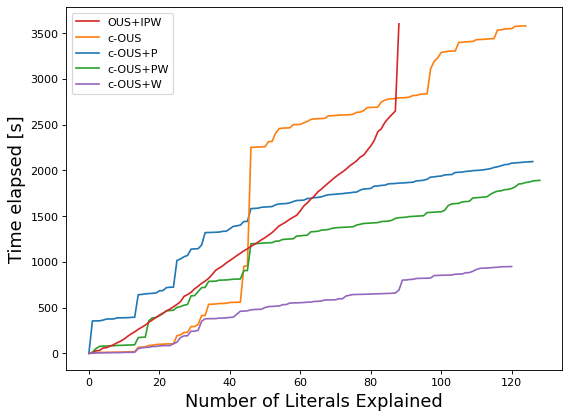

In [73]:
# experiment cumulative time in lit epxlanations²


fig=plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

ax=fig.add_subplot(111)

for setup in d:
    
    if d[setup]['timedout']:
        cumulative = [0] + d[setup]['cumulative'] + [3600]
    else:
        cumulative = [0] + d[setup]['cumulative'] 
    ax.plot(range(len(cumulative)) ,cumulative,label=matching_names[setup])
 
ax.set_xlabel('Number of Literals Explained', fontsize=16)
ax.set_ylabel('Time elapsed [s]', fontsize=16)
plt.legend(loc=2)
handles, labels = ax.get_legend_handles_labels()
# sort both labels and handles by labels
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles, labels)
plt.show()
fig.savefig('/home/crunchmonster/Desktop/omusConstrCumulative.png')

Text(0.5, 0, 'Number of Literals Explained')

Text(0, 0.5, 'Time elapsed [s]')

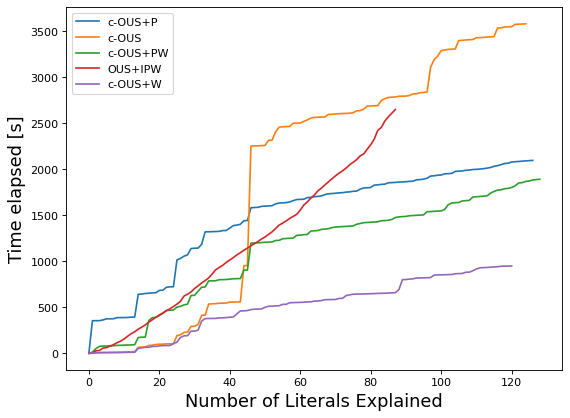

In [74]:
# experiment cumulative time in lit epxlanations²

fig=plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

ax=fig.add_subplot(111)


for setup in d:
    
    if 'OMUSCONSTR' in setup:
        continue
    cumulative = [0] + d[setup]['cumulative']
    ax.plot(range(len(cumulative)) ,cumulative,label=matching_names[setup])
 
ax.set_xlabel('Number of Literals Explained', fontsize=16)
ax.set_ylabel('Time elapsed [s]', fontsize=16)
plt.legend(loc=2)
plt.show()
fig.savefig('/home/crunchmonster/Desktop/omusNonConstrCumulative.png')

Text(0.5, 0, 'Number of Literals Explained')

Text(0, 0.5, 'Time elapsed [s]')

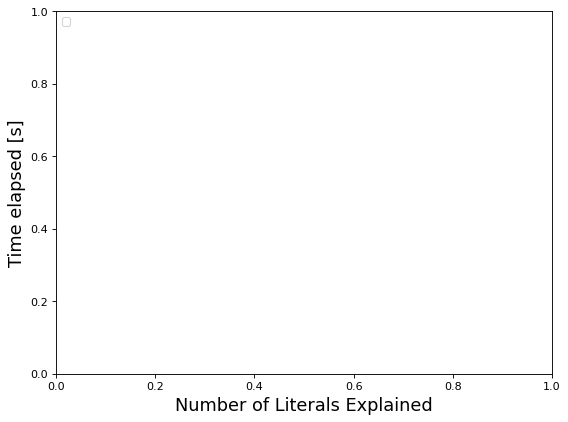

In [75]:
# experiment time vs lit

fig=plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

ax=fig.add_subplot(111)

for setup in d:
    if setup not in ['OMUSCONSTRWARM']:
        continue
    cumulative = d[setup]['exec_times']
    ax.plot(range(len(cumulative)) ,cumulative,label=setup)
 
ax.set_xlabel('Number of Literals Explained', fontsize=16)
ax.set_ylabel('Time elapsed [s]', fontsize=16)
plt.legend(loc=2)
plt.show()

Text(0.5, 0, 'Number of Literals Explained')

Text(0, 0.5, 'Explanation cost')

/home/crunchmonster/.local/lib/python3.7/site-packages/ipykernel_launcher.py:71: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


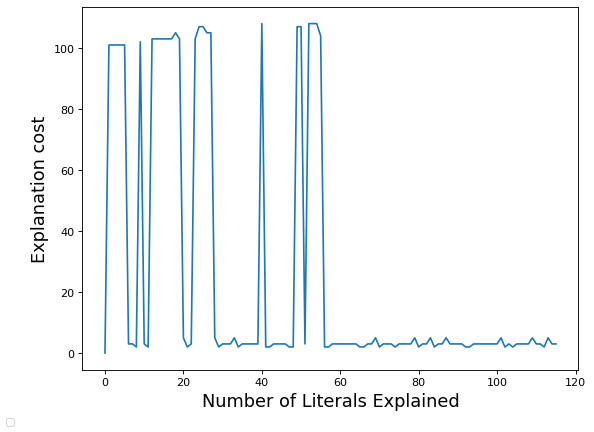

In [272]:
# Experiment3
def base_cost(explanation, nClues, nBij, nTrans):
    if nClues == 0 and nBij + nTrans == 1:
        return 0
    elif nClues == 0 and nBij + nTrans > 1:
        return 100
    else:
        return nClues*100
def cost_step(explanation, nClues, nBij, nTrans):
    return base_cost(explanation, nClues, nBij, nTrans) + explanation['facts'] + len(explanation['constraints'])

explanation_file = 'data/experiment3/' + '2020_09_09/' + 'explanations.json'
with open(explanation_file, "r") as read_file:
    explanations = json.load(read_file)

expl_seq = explanations['explanations']
tot_time = explanations['tot_exec_time']

d = {
    'Type Of Constraint': [],
    'FactsUsed': [],
    'Derived': [],
    'nConstranits': [],
    'cost':[],
    'nClues': [], 'nBij' :[], 'nTrans':[]
}


cnt = 0
added = []

for explanation in expl_seq:
    
    constr_type = explanation['clue']
    facts = explanation['facts']
    derived = explanation['derivations']
    nConstraints = explanation['constraints']
    if constr_type == 'clue' and len(explanation['constraints']) == 1:
        if explanation['constraints'][0][0] in added:
            continue
        else:
            added.append(explanation['constraints'][0][0])
    
    step_cost = cost_step(explanation,explanation['nClues'], explanation['nBij'], explanation['nTrans'])
    
    d['Type Of Constraint'].append(constr_type)
    d['FactsUsed'].append(facts)
    d['Derived'].append(derived)
    d['nConstranits'].append(nConstraints)
    d['cost'].append(step_cost)
    d['nClues'].append(explanation['nClues'])
    d['nBij'].append(explanation['nBij'])
    d['nTrans'].append(explanation['nTrans'])
    
    
df_expl_seq = pd.DataFrame(d) 

#print(df_expl_seq)



fig=plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

ax=fig.add_subplot(111)

ax.plot(range(len(d['cost'])+1), [0]+ d['cost'])
 
ax.set_xlabel('Number of Literals Explained', fontsize=16)
ax.set_ylabel('Explanation cost', fontsize=16)
fig.legend(loc=3)
fig.show()
fig.savefig('/home/crunchmonster/Desktop/explanation_cost.png')

In [273]:
display(HTML(df_expl_seq.to_html()))

,Type Of Constraint,FactsUsed,Derived,nConstranits,cost,nClues,nBij,nTrans
0,clue,0,1,[[1732]],101,1,0,0
1,clue,0,1,[[1725]],101,1,0,0
2,clue,0,2,[[1726]],101,1,0,0
3,clue,0,1,[[1730]],101,1,0,0
4,clue,0,1,[[1723]],101,1,0,0
5,transitivity,2,1,[[215]],3,0,0,1
6,transitivity,2,1,[[216]],3,0,0,1
7,bijectivity,1,4,[[156]],2,0,1,0
8,clue,1,1,[[1729]],102,1,0,0
9,transitivity,2,1,[[212]],3,0,0,1


In [274]:
d2 = {
    #'p':[1],
    'types':[4],
    '|dom|':[5],
    '|grid|':[150],
    'run_time': [str(1287.27) + 's'],
    '#steps':[len(d['Type Of Constraint'])],
    'max cost':[max(d['cost'])],
    'cost':[str(round(sum(d['cost'])/len(d['Type Of Constraint']), 2))],
    '1bij':[str(round(sum(1 if bi == 'bijectivity' else 0 for bi in d['Type Of Constraint'])/len(d['nBij'])*100, 2))+'%'],
    '1trans':[str(round(sum(1 if bi == 'transitivity' else 0  for bi in d['Type Of Constraint'])/len(d['nBij'])*100, 2))+'%'],
    '1clue':[str(round(sum(1 if bi == 'clue' else 0  for bi in d['Type Of Constraint'])/len(d['nBij'])*100, 2))+'%'],
    '1 clue+i':[str(round(sum(1 if bi == 'clue+constraints' else 0  for bi in d['Type Of Constraint'])/len(d['nBij'])*100, 2))+'%'],
    '1 multi i':[str(round(sum(1 if bi == 'multiple-constraints' else 0 for bi in d['Type Of Constraint'])/len(d['nBij'])*100, 2))+'%'],
    'mult c.':[str(round(sum(0 for bi in d['Type Of Constraint'])/len(d['nBij'])*100, 2))+'%'],
}

df2 = pd.DataFrame(d2)
display(HTML(df2.to_html()))
print(df2.to_latex())

,types,|dom|,|grid|,run_time,#steps,max cost,cost,1bij,1trans,1clue,1 clue+i,1 multi i,mult c.
0,4,5,150,1287.27s,115,108,25.87,27.83%,49.57%,6.09%,11.3%,5.22%,0.0%


\begin{tabular}{lrrrlrrlllllll}
\toprule
{} &  types &  |dom| &  |grid| &  run\_time &  \#steps &  max cost &   cost &    1bij &  1trans &  1clue & 1 clue+i & 1 multi i & mult c. \\
\midrule
0 &      4 &      5 &     150 &  1287.27s &     115 &       108 &  25.87 &  27.83\% &  49.57\% &  6.09\% &    11.3\% &     5.22\% &    0.0\% \\
\bottomrule
\end{tabular}



In [271]:
32.83/100 * (5) + 49.57/100 * (3) + 1.09 *103/100 +  16.52 *(103/100)

21.2669